In [39]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [40]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/train.csv"
stock = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [42]:
stock.loc[:,"종목명"]

0             3S
1         AJ네트웍스
2          AK홀딩스
3            APS
4          AP시스템
           ...  
987995    흥국에프엔비
987996      흥국화재
987997      흥아해운
987998        희림
987999        힘스
Name: 종목명, Length: 988000, dtype: object

In [43]:
stock_KA = stock[stock['종목코드']=='A003490']

In [44]:
stock_KA = stock_KA [['일자', '거래량', '시가', '고가', '저가', '종가']]

In [45]:
stock_KA

,일자,거래량,시가,고가,저가,종가
434,20210601,2449861,31950,32200,31500,31700
2434,20210602,11787950,31950,34300,31900,33650
4434,20210603,4808732,33750,34050,32850,33500
6434,20210604,3359676,33200,33700,32650,33150
8434,20210607,5403250,33150,33200,31700,32300
...,...,...,...,...,...,...
978434,20230523,628497,22600,22800,22500,22550
980434,20230524,583473,22450,22550,22300,22350
982434,20230525,1103892,22250,22300,22050,22050
984434,20230526,732933,22000,22050,21900,21900


In [46]:
stock_KA['일자'].value_counts()

20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: 일자, Length: 494, dtype: int64

In [47]:
def MinMaxScaler(stock_KA):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = stock_KA - np.min(stock_KA, 0)
    denominator = np.max(stock_KA, 0) - np.min(stock_KA, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [48]:
dfx = stock_KA[['시가', '고가', '저가', '거래량', '종가']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
dfx = dfx[['시가', '고가', '저가', '거래량']]
dfx

,시가,고가,저가,거래량
434,0.805054,0.790614,0.822222,0.179412
2434,0.805054,0.942238,0.851852,1.000000
4434,0.935018,0.924188,0.922222,0.386698
6434,0.895307,0.898917,0.907407,0.259362
8434,0.891697,0.862816,0.837037,0.438942
...,...,...,...,...
978434,0.129964,0.111913,0.155556,0.019359
980434,0.119134,0.093863,0.140741,0.015402
982434,0.104693,0.075812,0.122222,0.061134
984434,0.086643,0.057762,0.111111,0.028536


In [49]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [50]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.13357400721925217, 0.10108303249024488, 0.14814814814705074, 0.022058836452265706], [0.12996389891602914, 0.11191335739991398, 0.15185185185072703, 0.014975551303947898], [0.11552346570313701, 0.09747292418702184, 0.14814814814705074, 0.005514006109801328], [0.12996389891602914, 0.09747292418702184, 0.13333333333234568, 0.03984587356415942], [0.10108303249024488, 0.08303249097412972, 0.12592592592499313, 0.03994007600168264], [0.11191335739991398, 0.10469314079346792, 0.14074074073969822, 0.03919401378659668], [0.12996389891602914, 0.11191335739991398, 0.15555555555440329, 0.019358513035613624], [0.11913357400636004, 0.09386281588379881, 0.14074074073969822, 0.015402010659638372], [0.10469314079346792, 0.07581227436768366, 0.12222222222131686, 0.06113404268706072], [0.08664259927735275, 0.057761732851568506, 0.11111111111028805, 0.02853586915984406]] -> [0.1014492753615837]


In [51]:
print( len(data_X), len(data_y))

484 484


In [52]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout_2 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 4s 12ms/step - loss: 0.0067
Epoch 2/70
12/12 [==============================] - 0s 13ms/step - loss: 0.0059
Epoch 3/70
12/12 [==============================] - 0s 12ms/step - loss: 0.0063
Epoch 4/70
12/12 [==============================] - 0s 13ms/step - loss: 0.0058
Epoch 5/70
12/12 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 6/70
12/12 [==============================] - 0s 14ms/step - loss: 0.0068
Epoch 7/70
12/12 [==============================] - 0s 12ms/step - loss: 0.0065
Epoch 8/70
12/12 [==============================] - 0s 14ms/step - loss: 0.0059
Epoch 9/70
12/12 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 10/70
12/12 [==============================] - 0s 12ms/step - loss: 0.0061
Epoch 11/70
12/12 [==============================] - 0s 14ms/step - loss: 0.0059
Epoch 12/70
12/12 [==============================] - 0s 14ms/step - loss: 0.0068
Epoch 13/70
12/12 [==================

5/5 [==============================] - 0s 5ms/step


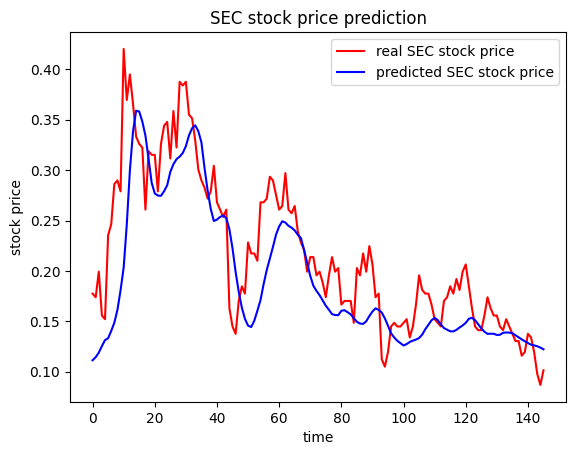

In [57]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
